# Ćwiczenia 4

***TEMAT:*** szeregi Fouriera

## Ortogonalność układu trygonometrycznego

#### Zadanie 1
Pokaż, że:

1.

 $$\int_{-\pi}^\pi \sin(nx)\sin(mx)dx=\begin{cases}\pi, & n=m;\\
0,& n\not= m;
\end{cases}
$$
dla każdego $n,m\geq 1$.

2.

$$\int_{-\pi}^\pi \cos(nx)\cos(mx)dx=\begin{cases}\pi, & n=m\not=0;\\
2\pi, & n=m=0;\\
0,& n\not= m;
\end{cases}
$$
dla każdego $n,m\geq 0$.

3. 

$$\int_{-\pi}^\pi \sin(nx)\cos(mx)dx=0
$$
dla każdego $n,m\geq 0$.


***Uwaga:*** na wykładzie 6 okaże się, że powyższe rachunki oznaczają ortogonalność rodziny funkcji $\{\sin(nx),\cos(mx): n\geq 1, m\geq 0\}$.

##### Rozwiązanie:
1. 
Jeśli $n=m$, to z "jedynki trygonometrycznej" i wzoru na cosinus podwojonego kąta wynika, że 

$$
\int_{-\pi}^\pi \sin(nx)\sin(nx)dx=\frac{1}{2}\int_{-\pi}^\pi 1- \cos(2nx)dx=\frac{1}{2}x-\frac{\sin(2nx)}{4n}\biggr|_{-\pi}^\pi=\pi.
$$

Jeśli $n\not=m$, to wiadomo że 

$$
\sin(nx)\sin(mx)=\frac{1}{2}\left( \cos((n-m)x)-\cos((n+m)x)\right).
$$

Zatem
$$
\int_{-\pi}^\pi \sin(nx)\sin(mx)dx=\frac{1}{2}\left(\frac{\sin((n-m)x)}{n-m}-\frac{\sin((n+m)x)}{n+m}\right)\biggr|_{-\pi}^\pi=0
$$

2. Dowodzi się tego w identyczny sposób jak wzoru w 1. 

3. Wystarczy zauważyć, że jak $n=0$, to $\sin(nx)\cos(mx)$=0, a dla $n\geq 1$ funkcja $\sin(nx)\cos(mx)$ jest nieparzysta.



## Szereg Fouriera dla funkcji 2$\pi$ okresowej: postać rzeczywista

### Rozwijanie funkcji w szereg Fouriera

***Twierdzenie*** 

Jeżeli szereg trygonometryczny 

$$
\frac {\displaystyle {a_0}}{\displaystyle 2}+ \sum_{n=1}^{\infty}
(a_n\cos nx+b_n\sin nx)
$$

jest zbieżny jednostajnie do funkcji $f$ na przedziale  $[-\pi,\pi]$, to

$$
a_0=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\; dx,\quad
a_n=\frac {\displaystyle 1}{\displaystyle {\pi}} \int_{-\pi}^{\pi}f(x)\cos nx\; dx,\quad
b_n=\frac {\displaystyle 1}{\displaystyle {\pi}} \int_{-\pi}^{\pi}f(x)\sin nx \; dx,
$$ 

dla $n=1,2,\ldots$. 

***Definicja***

Szereg 

$$\frac {\displaystyle {a_0}}{\displaystyle 2}+ \sum_{n=1}^{\infty}(a_n\cos nx+b_n\sin nx),
$$

w którym liczby $a_0,a_1,a_2,\ldots$, $b_1,b_2,\ldots$ są takie jak w twierdzeniu powyżej  nazywamy  szeregiem Fouriera odpowiadającym funkcji $f$.

***Bardzo ważne uwagi:***
>* na razie nic nie powiedzieliśmy o zbieżności szeregu Fouriera odpowiadającego funkcji $f$.
>* jeśli $f$ jest funkcją parzystą, to w jej szeregu Fouriera  wszystkie $b_n=0$.
>* jeśli $f$ jest funkcją nieparzystą, to w jej szeregu Fouriera  wszystkie $a_n=0$.

### Zbieżność szeregu Fouriera



***Definicja (funkcja kawałkami gładka)***

>* Mówimy, że funkcja $f$ ma nieciągłość skokową w punkcie $x_0$, gdy istnieją granice jednostronne

$$
f(x_0-):=\lim_{x\to x_0^-}f(x),\quad f(x_0+):=\lim_{x\to x_0^+}f(x). 
$$

>* Mówimy, że funkcja $f$ jest kawałkami gładka, gdy w dowolnym przedziale $(a,b)$ jest ciągła poza skończoną liczbą punktów przedziału $(a,b)$, jej punkty nieciągłości są nieciągłościami skokowymi, a pochodna funkcji $f$ jest ciągła poza skończoną liczbą punktów przedziału $(a,b)$.

***Twierdzenie***

Jeśli $2\pi$ okresowa funkcja $f$ jest kawałkami gładka na $\mathbb{R}$, to jej szereg Fouriera jest zbieżny dla dowolnego 
$x$ do wartości $\frac{f(x-)+f(x+)}{2}$.

***Uwaga:*** jeśli $f$ jest ciągła w punkcie $x$, to $\frac{f(x-)+f(x+)}{2}=f(x)$.

#### Zadanie 2: sygnał prostokątny 
Rozwiniemy w szereg Fouriera funkcję $2\pi  $ okresową $f$ taką, że 
$$
f(x)=\begin{cases}
1, & x\in[ 0,\pi];\\
0, & x\in (-\pi,0).
\end{cases}
$$

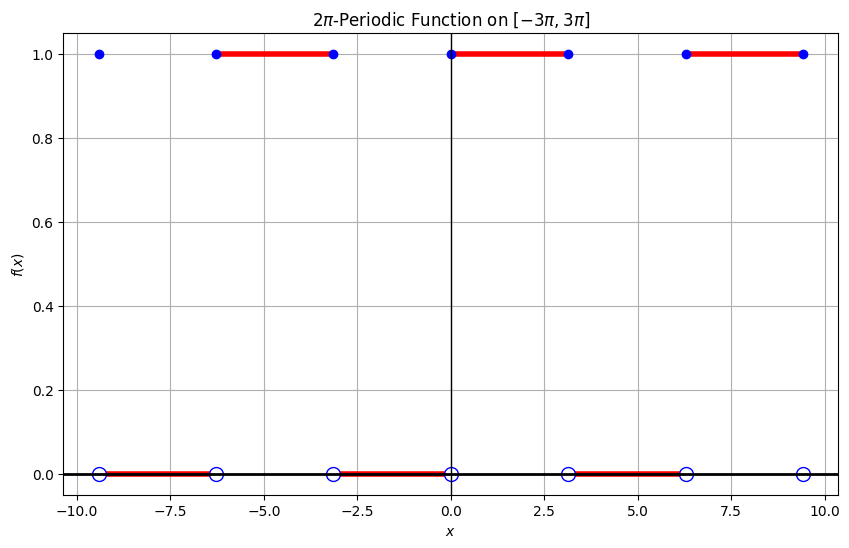

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function that is 0 on (-pi, 0) and 1 on [0, pi)
def periodic_piecewise(x):
    # Bring x into the interval [-pi, pi] using modulo
    x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
    # Define the piecewise function
    return np.where(x_mod >= 0, 1, 0)

# Generate x values from -3pi to 3pi
x = np.linspace(-3 * np.pi, 3 * np.pi, 1000)
y = periodic_piecewise(x)

# Plot the periodic function without vertical lines at discontinuities
plt.figure(figsize=(10, 6))

# Split the data into segments between -pi and pi to avoid vertical lines
for n in range(-3, 3):
    x_segment = x[(x >= n * np.pi) & (x < (n + 1) * np.pi)]
    y_segment = y[(x >= n * np.pi) & (x < (n + 1) * np.pi)]
    plt.plot(x_segment, y_segment, color='r',linewidth=4)

# Mark closed and open dots at the ends of intervals
for n in range(-3,4):
    plt.plot(n * np.pi, 1, 'bo',)  # Closed dot for x = n*pi and f(x) = 1

for n in range(-3,4):
    plt.plot(n * np.pi, 0, 'wo', markersize=10, markeredgecolor='b')  # Open dot for x = n*pi and f(x) = 1

# Add axis lines
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=1)

# Set labels and title
plt.title(r'2$\pi$-Periodic Function on $[-3\pi, 3\pi]$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

# Add grid 
plt.grid(True)

# Show the plot
plt.show()


##### Rozwiązanie:
Mamy:

1.
$$
a_0=\frac{1}{\pi}\int_{-\pi}^\pi f(x)dx=\frac{1}{\pi}\int_0^\pi 1dx=1.
$$

2. Dla $n\geq 1$
$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx = \frac{1}{\pi} \int_0^\pi \cos(nx) \, dx = \frac{\sin(nx)}{\pi n} \bigg|_0^\pi = 0.
$$

3. Dla $n\geq 1$
$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \, dx = \frac{1}{\pi} \int_{0}^{\pi} \sin(nx) \, dx = -\frac{\cos(nx)}{\pi n} \bigg|_{0}^{\pi} = -\frac{(-1)^n - 1}{\pi n}=\frac{1-(-1)^n}{\pi n}.
$$

Ostatecznie szereg Foueriera naszej funkcji, to szereg

$$
\frac{1}{2}+\sum_{n=1}^\infty\frac{1-(-1)^n}{\pi n}\sin(nx).
$$

Zgodnie z twierdzeniem powyżej, dla $x$ będących całkowitymi wielokrotnościami $\pi$ jest on zbieżny do $1/2$, dla pozostałych 
$x$ jest on zbieżny do $f(x)$.

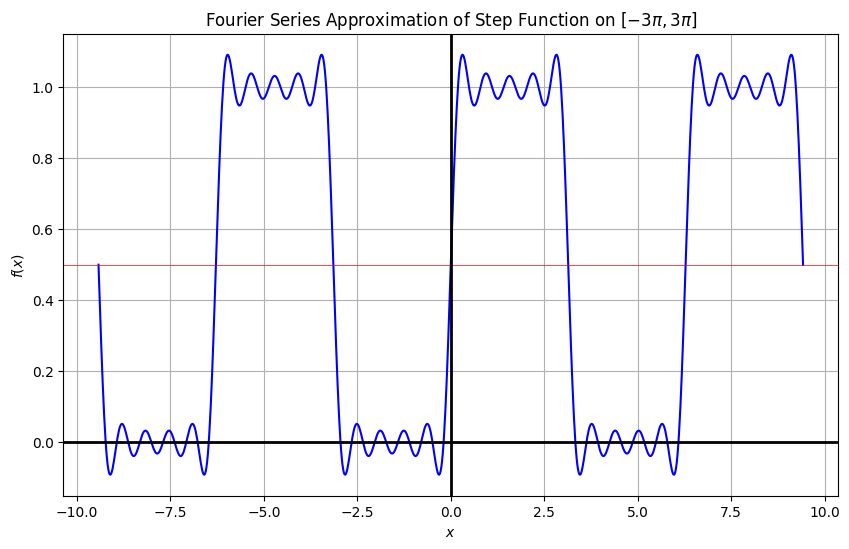

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Fourier series approximation
def fourier_series_step_function(x, n_terms):
    result = 0.5  # a_0 / 2 term
    for n in range(1, n_terms + 1, 2):  # Only odd terms contribute
        result += (2 / (n * np.pi)) * np.sin(n * x)
    return result

# Generate x values from -3pi to 3pi
x = np.linspace(-3 * np.pi, 3 * np.pi, 1000)

# Compute Fourier series approximation with a certain number of terms
n_terms = 10  # You can increase this for a better approximation
y = fourier_series_step_function(x, n_terms)

# Plot the Fourier series
plt.figure(figsize=(10, 6))
plt.plot(x, y,  color='b')



# Add axis lines
plt.axhline(0, color='black', linewidth=2)
plt.axhline(0.5, color='red', linewidth=0.5)
plt.axvline(0, color='black', linewidth=2)

# Set labels and title
plt.title(r'Fourier Series Approximation of Step Function on $[-3\pi, 3\pi]$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

# Add grid, legend, and show the plot
plt.grid(True)

plt.show()


***Zadanie domowe:***
Zapoznaj się z materiałem znajdującym się tutaj: https://en.wikipedia.org/wiki/Gibbs_phenomenon.

#### Zadanie 3: sygnał trójkątny

Rozwiniemy w szereg Fouriera funkcję $2\pi $ okresową $f$ taką, że 
$f(x)=|x|$ dla $x\in[-\pi,\pi]$.

##### Rozwiązanie


1. Obliczamy $a_0$:

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, dx = \frac{2}{\pi} \int_{0}^{\pi} x \, dx = \pi.
$$



2. Obliczamy $a_n$:

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx = \frac{2}{\pi} \int_{0}^{\pi} x \cos(nx) \, dx=
\frac{2}{\pi}\left( \frac{x \sin(nx)}{n} + \frac{\cos(nx)}{n^2} \right) \bigg|_{0}^{\pi}=
2\frac{(-1)^n-1}{\pi n^2}
$$



3. Wszystkie współczynniki $b_n$ są równe 0, bo funkcja jest parzysta.

Ostatecznie, szereg Fouriera funkcji $f(x) = |x|$ to

$$
\frac{\pi}{2} + \sum_{n=1}^{\infty} 2\frac{(-1)^n-1}{\pi n^2} \cos(nx).
$$

Dla każdego $x$ jest on zbieżny do $f(x)$.


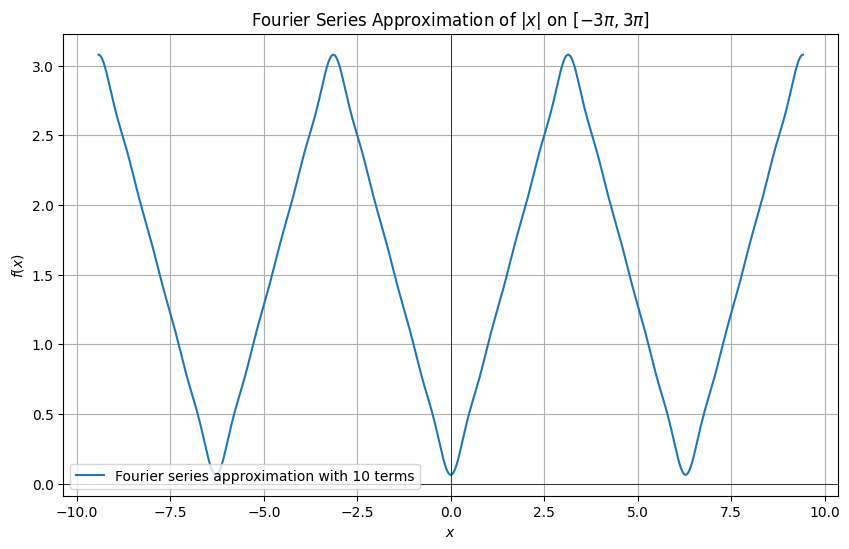

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Fourier series of |x|
def fourier_series_abs_x(x, n_terms):
    # Start with the a_0 term which is pi/2
    result = np.pi / 2
    for n in range(1, n_terms + 1):
        # Add the cosine terms with alternating signs
        result += (2 / np.pi) * (((-1)**n -1)/ n**2) * np.cos(n * x)
    return result

# Generate x values from -3pi to 3pi
x = np.linspace(-3 * np.pi, 3 * np.pi, 1000)

# Compute Fourier series approximation for |x|
n_terms = 10  # Number of terms in the series
y = fourier_series_abs_x(x, n_terms)

# Plot the Fourier series
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Fourier series approximation with {n_terms} terms')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title(r'Fourier Series Approximation of $|x|$ on $[-3\pi, 3\pi]$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)
plt.legend()
plt.show()


## Szereg Fouriera dla funkcji 2$\pi$ okresowej: postać zespolona

#### Zadanie 4

Wyprowadzimy zespoloną postać szeregu Fouriera.

##### Rozwiązanie:
Wiemy, że

$$
e^{ix}=\cos x +i\sin x\quad\text{oraz}\quad e^{-ix}=\cos x -i\sin x. 
$$

Stąd

$$
\cos x=\frac{e^{ix}+e^{-ix}}{2}\quad\text{i}\quad\sin x=-i\frac{e^{ix}-e^{-ix}}{2}.
$$

Zatem

$$
\begin{align}
\frac{a_0}{2}+\sum_{n=1}^\infty\left( a_n\cos(nx)+b_n\sin(nx)\right)=&\frac{a_0}{2}+
\sum_{n=1}^\infty \left(a_n\frac{e^{inx}+e^{-inx}}{2}-ib_n\frac{e^{inx}-e^{-inx}}{2}\right)\\
=&\frac{a_0}{2}+\sum_{n=1}^\infty\left(\frac{a_n-ib_n}{2}e^{inx}+\frac{a_n+ib_n}{2}e^{-inx}\right)\\
=& \sum_{n=-\infty}^\infty c_ne^{inx},
\end{align}
$$
gdzie 

$$
c_0=\frac{a_0}{2},\quad c_n=\begin{cases}
\frac{a_n-ib_n}{2}, & n>0;\\
\frac{a_{-n}+ib_{-n}}{2},& n<0.
\end{cases}
$$

***Uwaga:***

Można sprawdzić, że dla każdego $n\in\mathbb{Z}$ mamy:

$$
c_n=\frac{1}{2\pi}\int_{-\pi}^\pi f(x)e^{-inx}dx.
$$

#### Zadanie 5: sygnał prostokątny po raz drugi
Rozwiniemy w zespolony szereg Fouriera funkcję $2\pi$ okresową $f$ taką, że 
$$
f(x)=\begin{cases}
1, & x\in[ 0,\pi];\\
0, & x\in (-\pi,0).
\end{cases}
$$

##### Rozwiązanie I
Wiemy już, że:

$$
a_0=1 \text{ oraz } a_n =  0, b_n =\frac{1-(-1)^n}{\pi n} \text{ dla }n\geq 1.
$$

Zatem 
$$
c_0=\frac{1}{2}
$$
oraz

$$
c_n=\begin{cases}
i\frac{(-1)^n-1}{2\pi n}, & n>0\\
i\frac{(-1)^n-1}{2\pi n}, & n<0
\end{cases}
$$

##### Rozwiązanie II
Mamy

$$
c_0=\frac{1}{2\pi}\int_{-\pi}^\pi f(x)dx=\frac{1}{2\pi}\int_{0}^\pi1dx=\frac{1}{2}.
$$

Dla całkowitych $n\not=0$ mamy

$$
c_n=\frac{1}{2\pi}\int_{-\pi}^\pi f(x)e^{-inx}dx=\frac{1}{2\pi}\int_{0}^\pi e^{-inx}dx=
\frac{e^{-inx}}{-2in\pi}\big|_0^\pi=\frac{(-1)^n-1}{-2in\pi}=i\frac{(-1)^n-1}{2n\pi}.
$$

## Zastosowanie: sumowanie pewnych szeregów

#### Zadanie 6
Rozwiniemy w szereg Fouriera $2\pi$ okresową funkcję $f$ taką, że $f(x)=x^2$ dla $x\in[-\pi,\pi]$.
Następnie na dwa sposoby policzymy wartość tej funkcji dla $x=\pi$. Na końcu sprawdzimy co dla tej funkcji oznacza tożsamość Parservala.

##### Rozwiązanie:
 Wszystkie współczynniki $b_n=0$, bo funkcja $f$ jest parzysta.
Łatwo jest policzyć, że 

$$
a_0=\frac{2}{3}\pi^2.
$$
Ponadto dwukrotne całkowanie przez części daje, że dla $n\geq 1$ mamy

$$
a_n=4\frac{(-1)^n}{n^2}.
$$

Stąd 

$$
f(x)=\frac{\pi^2}{3}+4\sum_{n=1}^\infty \frac{(-1)^n}{n^2}\cos(nx).
$$

Podstawiając $x=\pi$
otrzymujemy, że 

$$
\pi^2=\frac{\pi^2}{3}+4\sum_{n=1}^\infty\frac{1}{n^2}.
$$

Stąd

$$
\sum_{n=1}^\infty\frac{1}{n^2}=\frac{\pi^2}{6}.
$$

Przypomnijmy teraz, że tożsamość Parservala mówi, że dla odpowiednio "dobrych" funkcji mamy:

***Twierdzenie***
$$
\frac{a_0^2}{2}+\sum_{n=1}^{\infty}(a_n^2+b_n^2)=\frac{1}{\pi}\Vert f \Vert_2^2.
$$

Mamy

$$
\frac{1}{\pi}\Vert f \Vert_2^2=\frac{1}{\pi}\int_{-\pi}^\pi x^4dx=\frac{2\pi^4}{5}.
$$

Podstawiając to do wzoru otrzymujemy po prostych przekształceniach, że 

$$
\sum_{n=1}^\infty\frac{1}{n^4}=\frac{\pi^4}{90}.
$$